<a href="https://colab.research.google.com/github/el-thobhy/rainfall-prediction/blob/master/test_code_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np

### Data Loading

In [157]:
data_baru = pd.read_excel('../Data Des 2022 to Feb 2023 perjam Clean.xlsx')
data_baru = data_baru.drop('klasifikasi', axis=1)
data_baru.head()

,Date and Time,Air Tmp (C) M 60 Min,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,WS 60 Min (kt) M
0,1/12/2022 0:00,23.73,0.0,1009.01,100.0,2.0
1,1/12/2022 1:00,26.51,0.0,1009.35,92.9,2.0
2,1/12/2022 2:00,28.45,0.0,1009.47,81.8,2.0
3,1/12/2022 3:00,29.59,0.0,1009.11,75.2,2.0
4,1/12/2022 4:00,30.68,0.0,1008.14,69.8,4.0


### Explanatory Data Analysis

_*Variable description*_

- Date and Time = Date and Time
- Air Tmp (C) M 60 Min
- Mag WD 60 Min (deg) M
- Precip 1Hr (mm) M
- QNH (hPa) M
- RH (%) M 60 Min
- True WD 60 Min (deg) M
- WS 60 Min (kt) M
- klasifikasi

In [159]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date and Time         2040 non-null   object 
 1   Air Tmp (C) M 60 Min  2040 non-null   float64
 2   Precip 1Hr (mm) M     2040 non-null   float64
 3   QNH (hPa) M           2040 non-null   float64
 4   RH (%) M 60 Min       2040 non-null   float64
 5   WS 60 Min (kt) M      2040 non-null   float64
dtypes: float64(5), object(1)
memory usage: 95.8+ KB


In [160]:
# data_baru.sort_values(by=['Date and Time'], inplace=True, ascending=True)
data_baru.set_index('Date and Time', inplace= True)

#### Missing value

In [161]:
data_baru.describe()

,Air Tmp (C) M 60 Min,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,WS 60 Min (kt) M
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,26.396240,0.266593,1009.248248,84.888382,3.689706
std,2.767906,1.776614,1.964072,12.993643,2.382819
min,21.920000,0.000000,1002.980000,43.300000,0.000000
25%,24.160000,0.000000,1008.017500,75.400000,2.000000
50%,25.530000,0.000000,1009.210000,89.000000,3.000000
75%,28.525000,0.000000,1010.600000,96.000000,5.000000
max,33.710000,29.700000,1014.260000,100.000000,13.000000


_ada lebih dari 100 data yang hilang, total data adalah 2039, dan yang terhitung 1900_

In [162]:
conditions = [
    (data_baru['Precip 1Hr (mm) M']==0),
    (data_baru['Precip 1Hr (mm) M']<1),
    (data_baru['Precip 1Hr (mm) M']>=1) & (data_baru['Precip 1Hr (mm) M']<=5),
    (data_baru['Precip 1Hr (mm) M']>=5) & (data_baru['Precip 1Hr (mm) M']<=20),
    (data_baru['Precip 1Hr (mm) M']>=10) & (data_baru['Precip 1Hr (mm) M']<=20),
    (data_baru['Precip 1Hr (mm) M']>=20),
]

values = ['tidak hujan', 'sangat ringan', 'ringan', 'sedang', 'sangat lebat', 'lebat']

data_baru['classification'] = np.select(conditions, values)
# data_classified = data_baru
# writer = pd.ExcelWriter('data/data_classified.xlsx')
# data_classified.to_excel(writer)
# writer.save()
target = ['classification']
feature = target[0]
count = data_baru[feature].value_counts()
percent = 100*data_baru[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
df

,jumlah sampel,persentase
tidak hujan,1834,89.9
sangat ringan,127,6.2
ringan,52,2.5
sedang,23,1.1
lebat,4,0.2


In [163]:
data_baru.isnull().sum()

Air Tmp (C) M 60 Min    0
Precip 1Hr (mm) M       0
QNH (hPa) M             0
RH (%) M 60 Min         0
WS 60 Min (kt) M        0
classification          0
dtype: int64

In [164]:
# data_hilang = data_baru.isnull().sum()
# data_hilang = pd.DataFrame(data_hilang)
# writer = pd.ExcelWriter('data_hil.xlsx')
# data_hilang.to_excel(writer)
# writer.save()

In [165]:
# data_baru = data_baru.dropna(how='any',axis=0) 
# data_baru.count()

In [166]:
# data_baru.isnull().sum()

In [167]:
# data_baru = data_baru.drop(data_baru.columns[[1,5]], axis=1)

In [168]:
conditions = [
    (data_baru['Precip 1Hr (mm) M']==0),
    (data_baru['Precip 1Hr (mm) M']>0) & (data_baru['Precip 1Hr (mm) M']<=5),
    (data_baru['Precip 1Hr (mm) M']>=5) & (data_baru['Precip 1Hr (mm) M']<=20) | (data_baru['Precip 1Hr (mm) M']>=20),    
]

values = ['tidak hujan', 'ringan', 'normal dan lebat']

data_baru['classification'] = np.select(conditions, values)
target = ['classification']
feature = target[0]
count = data_baru[feature].value_counts()
percent = 100*data_baru[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
df

,jumlah sampel,persentase
tidak hujan,1834,89.9
ringan,179,8.8
normal dan lebat,27,1.3


#### Pesebaran data

dilihat dengan histogram

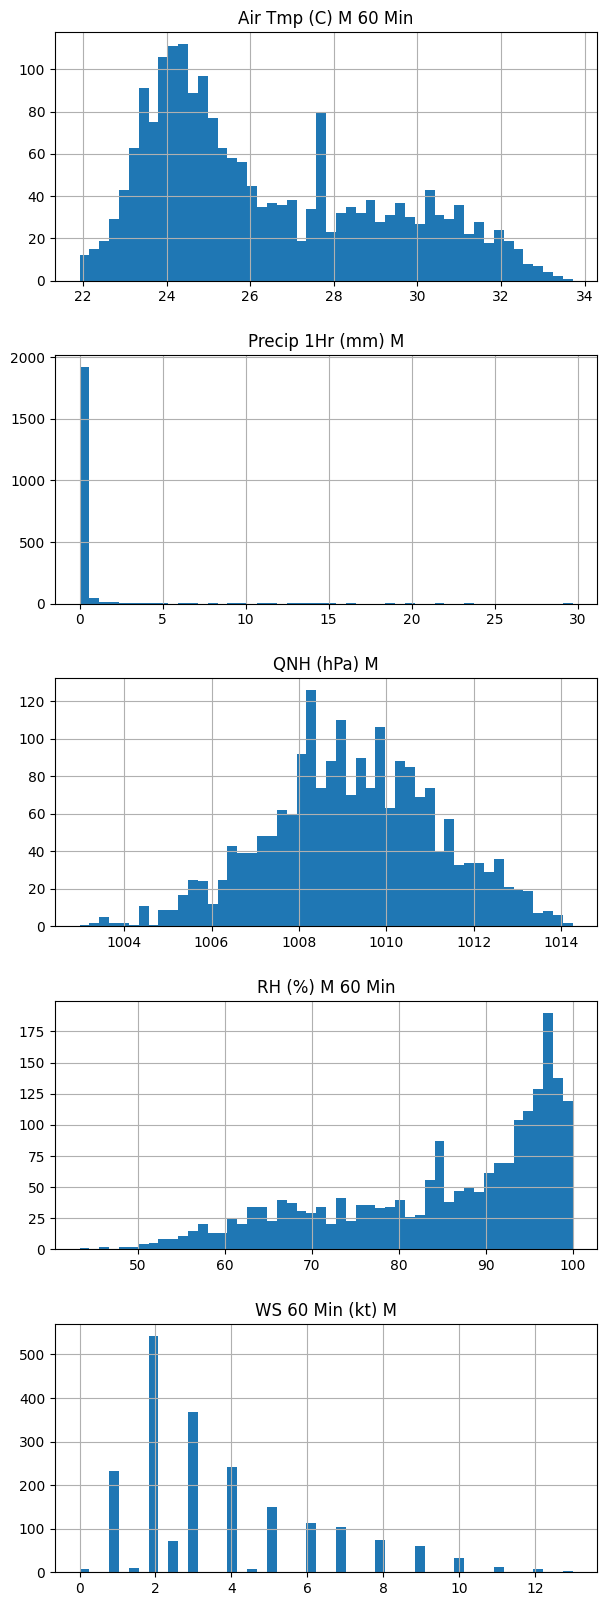

In [170]:
import matplotlib.pyplot as plt

data_baru.hist(bins=50, figsize=(7,20), layout=(5,1))
plt.show()

#### Matriks korelasi

C:\Users\auriw\AppData\Local\Temp\ipykernel_17916\1150458498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_baru.corr().round(2)


<Axes: >

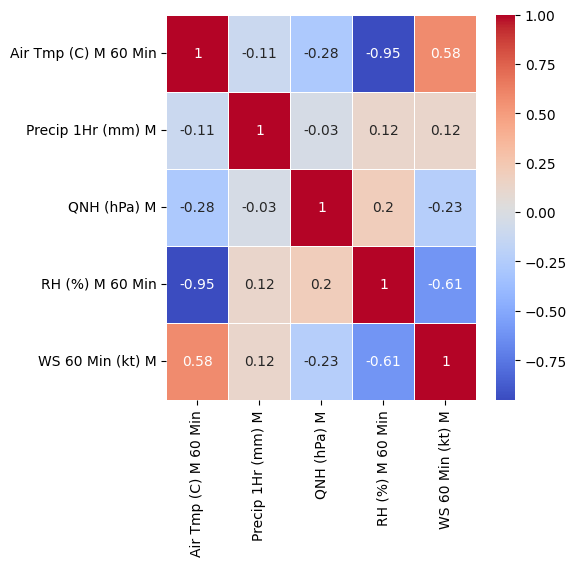

In [171]:
plt.figure(figsize=(5, 5))
correlation_matrix = data_baru.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )

In [172]:
# Get the correlation coefficients for "rain_sum" feature
rain_corr = data_baru.corr()['Precip 1Hr (mm) M'].sort_values(ascending=False)
rain_corr

C:\Users\auriw\AppData\Local\Temp\ipykernel_17916\2926031926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rain_corr = data_baru.corr()['Precip 1Hr (mm) M'].sort_values(ascending=False)


Precip 1Hr (mm) M       1.000000
WS 60 Min (kt) M        0.121768
RH (%) M 60 Min         0.117740
QNH (hPa) M            -0.029182
Air Tmp (C) M 60 Min   -0.112329
Name: Precip 1Hr (mm) M, dtype: float64

### Data preparation

#### one-hot encoding

mengubah data kategori dengan one-hot encoding

In [173]:
data_baru = pd.get_dummies(data_baru)
data_baru

,Air Tmp (C) M 60 Min,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,WS 60 Min (kt) M,classification_normal dan lebat,classification_ringan,classification_tidak hujan
Date and Time,,,,,,,,
1/12/2022 0:00,23.73,0.0,1009.01,100.0,2.0,0,0,1
1/12/2022 1:00,26.51,0.0,1009.35,92.9,2.0,0,0,1
1/12/2022 2:00,28.45,0.0,1009.47,81.8,2.0,0,0,1
1/12/2022 3:00,29.59,0.0,1009.11,75.2,2.0,0,0,1
1/12/2022 4:00,30.68,0.0,1008.14,69.8,4.0,0,0,1
...,...,...,...,...,...,...,...,...
23/02/2023 19:00:00,25.00,0.0,1008.60,90.0,2.0,0,0,1
23/02/2023 20:00:00,24.70,0.0,1008.37,92.2,2.0,0,0,1
23/02/2023 21:00:00,24.31,0.0,1008.40,92.9,2.0,0,0,1


In [174]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 1/12/2022 0:00 to 23/02/2023 23:00:00
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Air Tmp (C) M 60 Min             2040 non-null   float64
 1   Precip 1Hr (mm) M                2040 non-null   float64
 2   QNH (hPa) M                      2040 non-null   float64
 3   RH (%) M 60 Min                  2040 non-null   float64
 4   WS 60 Min (kt) M                 2040 non-null   float64
 5   classification_normal dan lebat  2040 non-null   uint8  
 6   classification_ringan            2040 non-null   uint8  
 7   classification_tidak hujan       2040 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 166.1+ KB


Membagi data train dataset

In [175]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 1/12/2022 0:00 to 23/02/2023 23:00:00
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Air Tmp (C) M 60 Min             2040 non-null   float64
 1   Precip 1Hr (mm) M                2040 non-null   float64
 2   QNH (hPa) M                      2040 non-null   float64
 3   RH (%) M 60 Min                  2040 non-null   float64
 4   WS 60 Min (kt) M                 2040 non-null   float64
 5   classification_normal dan lebat  2040 non-null   uint8  
 6   classification_ringan            2040 non-null   uint8  
 7   classification_tidak hujan       2040 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 166.1+ KB


pertama untuk data fitur hapus kolom precip, dan klasifikasi

In [176]:
from sklearn import preprocessing

df_new = data_baru
X = df_new.drop(df_new.columns[[1,5,6,7]], axis=1)

In [177]:
y = df_new[['classification_normal dan lebat','classification_ringan', 'classification_tidak hujan']]

In [178]:
from sklearn.model_selection import train_test_split
#40 best random state
#32 better random state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, test_size = 0.40, random_state=50, shuffle=True)

print('train_normal dam lebat',(y_train['classification_normal dan lebat'] == 1).sum())
print('train_ringan',(y_train['classification_ringan'] == 1).sum())
print('train_tidak hujan',(y_train['classification_tidak hujan'] == 1).sum())

print('\ntest_normal dam lebat',(y_test['classification_normal dan lebat'] == 1).sum())
print('test_ringan',(y_test['classification_ringan'] == 1).sum())
print('test_tidak hujan',(y_test['classification_tidak hujan'] == 1).sum())

print('\ntotal normal dam lebat',(y['classification_normal dan lebat'] == 1).sum())
print('total ringan',(y['classification_ringan'] == 1).sum())
print('total tidak hujan',(y['classification_tidak hujan'] == 1).sum())

train_normal dam lebat 18
train_ringan 110
train_tidak hujan 1096

test_normal dam lebat 9
test_ringan 69
test_tidak hujan 738

total normal dam lebat 27
total ringan 179
total tidak hujan 1834


##### Standarisasi data train

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
pd.DataFrame(X_train).describe().round(2)

,0,1,2,3
count,1224.00,1224.00,1224.00,1224.00
mean,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.64,-3.07,-3.19,-1.58
25%,-0.82,-0.62,-0.71,-0.74
50%,-0.31,-0.04,0.29,-0.31
75%,0.77,0.70,0.87,0.53
max,2.64,2.43,1.20,3.91


Jumlah data train dan test

In [180]:
print(X_train.shape)
print(X_test.shape)


(1224, 4)
(816, 4)


In [181]:
# data_split = {
#     'Data latih': X_train.count(),
#     'Data uji': X_test.count(),
#     }
# split = pd.DataFrame(data_split)
# writer = pd.ExcelWriter('data/data_split.xlsx')
# split.to_excel(writer)
# writer.save()

In [182]:
# data_split_target = {
#     'Data latih': y_train.count(),
#     'Data uji': y_test.count(),
#     }
# split = pd.DataFrame(data_split_target)
# writer = pd.ExcelWriter('data/data_split_target.xlsx')
# split.to_excel(writer)
# writer.save()

## Model Development

In [183]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve
import plotly.express as px
import plotly.graph_objs as go


##### Tampa tuning

In [184]:
xgb = XGBClassifier(
    max_depth=6, 
    n_estimators=100, 
    learning_rate=0.3, )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Dengan Tuning

mendefenisikan hyperparameter

In [185]:
from scipy.stats import uniform, randint
import numpy as np
params = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': uniform(0.01, 1)
}
params

{'n_estimators': [100],
 'max_depth': [6],
 'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x176db787690>}

##### Tuning dengan RSCV

In [186]:
# Define the XGBoost model
xgb_model = XGBClassifier()
# Perform random search
search = RandomizedSearchCV(
    xgb_model, param_distributions=params, 
    n_iter=50, 
    cv=10,
    scoring='accuracy', 
    n_jobs=-1,
    )
search.fit(X_train, y_train)
print("Best hyperparameters: ", search.best_params_)
print("Accuracy", search.best_score_)

Best hyperparameters:  {'learning_rate': 0.010056047538517401, 'max_depth': 6, 'n_estimators': 100}
Accuracy 0.8888644542183128


In [187]:
#fine search
best_params = search.best_params_
param_dist = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': np.logspace(np.log10(best_params['learning_rate']-0.01), np.log10(best_params['learning_rate']+0.1), 50),
}

fine_search = GridSearchCV(
    xgb_model, param_grid=param_dist, 
    cv=10, 
    scoring='accuracy', 
    n_jobs=-1,
    )
fine_search.fit(X_train, y_train)


print("Best hyperparameters: ", fine_search.best_params_)
print("Accuracy", fine_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.023418624756907692, 'max_depth': 6, 'n_estimators': 100}
Accuracy 0.8896907903505265


### Model Evaluation

#### Standarisasi data test

In [188]:
X_test = scaler.transform(X_test)
pd.DataFrame(X_test).describe().round(2)

,0,1,2,3
count,816.00,816.00,816.00,816.00
mean,-0.05,-0.05,0.07,-0.06
std,1.01,1.04,1.01,1.02
min,-1.63,-3.26,-2.82,-1.16
25%,-0.85,-0.74,-0.67,-0.74
50%,-0.37,-0.06,0.47,-0.31
75%,0.75,0.62,0.92,0.53
max,2.48,2.57,1.20,3.91


#### tampa tuning

In [189]:
pred_no_tuning = xgb.predict(X_test)

[[  4   0   5]
 [  3  11  55]
 [ 17  19 702]]


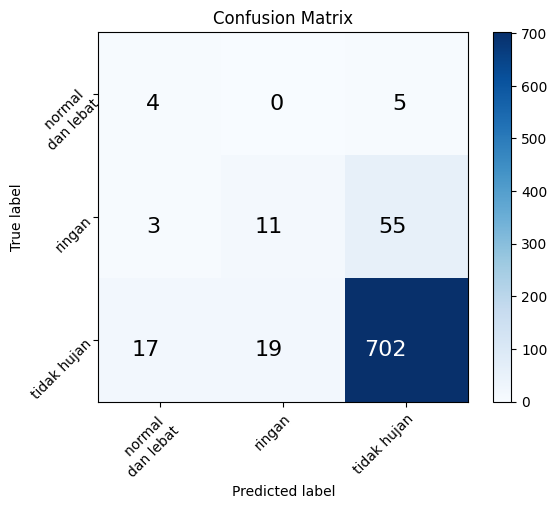

In [242]:
cm = confusion_matrix(
    y_test.values.argmax(axis=1), pred_no_tuning.argmax(axis=1))
print(cm)

label_names = ['normal \ndan lebat','ringan', 'tidak hujan']
# Mengubah sumbu x dan y menjadi nama label
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Menambahkan colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Menentukan label pada sumbu x dan y
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=label_names, yticklabels=label_names,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')

#mengubah rotasi texgt
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mengatur penampilan teks
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), fontsize=16.0,
                ha="right", va="top",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [191]:
# calculate the accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, pred_no_tuning)
precision = precision_score(y_test, pred_no_tuning, average='weighted')
recall = recall_score(y_test, pred_no_tuning, average='weighted')
f1 = f1_score(y_test, pred_no_tuning, average='weighted')

# tn, fp, fn, tp = confusion_matrix(y_test.values.argmax(axis=1), pred_no_tuning.argmax(axis=1)).ravel()

# # Menghitung specificity score
# accuracy = (tp + tn) / (tp + fp+ tn + fn)
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = 2*((precision*recall)/(precision+recall))
# specificity = tn / (tn + fp)

# calculate the ROC-AUC score of the model
# roc_auc = roc_auc_score(y_test, pred_no_tuning)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
# print(f"Sensitivity score: {specificity:.2f}")
# print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 0.87
Precision: 0.86
Recall: 0.88
F1-score: 0.87


In [192]:
print(classification_report(y_test,pred_no_tuning))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.37      0.16      0.22        69
           2       0.92      0.96      0.94       738

   micro avg       0.89      0.88      0.88       816
   macro avg       0.54      0.48      0.50       816
weighted avg       0.86      0.88      0.87       816
 samples avg       0.88      0.88      0.88       816



c:\Users\auriw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Dengan tuning

In [193]:
y_pred = fine_search.best_estimator_.predict(X_test)

[[  4   0   5]
 [  1   6  62]
 [  9   8 721]]


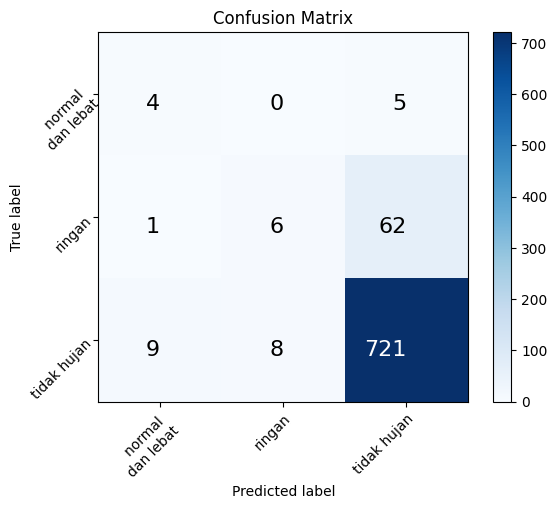

In [244]:
cm = confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
label_names = ['normal \ndan lebat','ringan', 'tidak hujan']
# Mengubah sumbu x dan y menjadi nama label
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Menambahkan colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Menentukan label pada sumbu x dan y
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=label_names, yticklabels=label_names,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')

#mengubah rotasi texgt
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mengatur penampilan teks
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), fontsize=16.0,
                ha="right", va="top",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [245]:
# calculate the accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Menghitung confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

# Menghitung specificity score
# accuracy = (tp + tn) / (tp + fp+ tn + fn)
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = 2*((precision*recall)/(precision+recall))
# specificity = tn / (tn + fp)


# calculate the ROC-AUC score of the model
# roc_auc = roc_auc_score(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
# print(f"Specificity-score: {specificity:.2f}")
# print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 0.89
Precision: 0.87
Recall: 0.90
F1-score: 0.87


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.43      0.09      0.14        69
           2       0.91      0.98      0.95       738

   micro avg       0.90      0.90      0.90       816
   macro avg       0.65      0.47      0.51       816
weighted avg       0.87      0.90      0.87       816
 samples avg       0.90      0.90      0.90       816



c:\Users\auriw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
# data_baru.info()

In [198]:
# # data_baru['kategori'] = data_baru.apply(lambda x: 'rain' if x['klasifikasi_rain'] == 1 else ('no rain'), axis=1)
# # data_baru
# ##check jumlah data encoding masing masing kategory
# conditions = [
#     (data_baru['classification_ringan dan sedang']==1),
#     (data_baru['classification_sangat ringan']==1),
#     (data_baru['classification_tidak hujan']==1)
# ]

# values = ['ringan dan sedang', 'sangat ringan', 'tidak hujan']
# data_baru['classification'] = np.select(conditions, values)
# data_baru.head()

#### Visualisasi Tuning

In [199]:
result_coarse = search.cv_results_
result_fine = fine_search.cv_results_

In [200]:
params_key = [f"param_{p}" for p in params.keys()]
params_key.append('Accuracy')
params_key

['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'Accuracy']

In [201]:
Accuracy = []
for mean_score in result_coarse["mean_test_score"]:
    Accuracy.append(mean_score)
accuracy = {}
accuracy['Accuracy'] = Accuracy
result_coarse['Accuracy'] = Accuracy

In [202]:
Accuracy_Fine = []
for mean_score in result_fine["mean_test_score"]:
    Accuracy_Fine.append(mean_score)
accuracy_fine = {}
accuracy_fine['Accuracy'] = Accuracy_Fine
result_fine['Accuracy'] = Accuracy_Fine

In [203]:
# # create a dataframe from results
# fig = px.scatter(result_coarse, x = params_key[2], 
#                     y = params_key[3])
# fig.update_traces(marker=dict(color='red'))
# fig.add_trace(px.scatter(result_fine, x = params_key[2], 
#                     y = params_key[3]).data[0])

# # menyatukan kedua plot dalam satu objek

# fig.show()


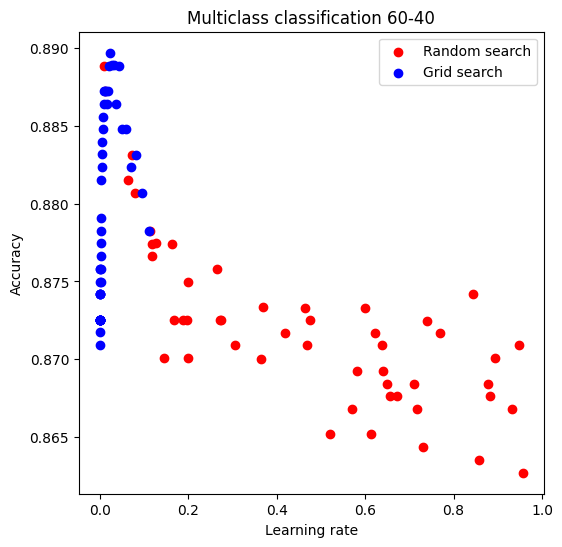

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
x1= result_coarse['param_learning_rate']
y1= result_coarse['mean_test_score']

x2= result_fine['param_learning_rate']
y2= result_fine['mean_test_score']

plt.scatter(x1, y1, color='red', label='Random search')

plt.scatter(x2, y2, color='blue', label='Grid search')

plt.legend()
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Multiclass classification 60-40')

# Tampilkan grafik
plt.show()

In [205]:
hasil = pd.DataFrame(search.cv_results_)
hasil = hasil.sort_values('mean_test_score', ascending=False)

In [206]:
# plt.figure(figsize=(10,6))
# plt.scatter(hasil['param_learning_rate'], hasil['param_max_depth'], c=hasil['mean_test_score'], cmap='viridis')
# plt.colorbar()
# plt.title('random, Search Scatter Plot')
# plt.xlabel('param_learning_rate')
# plt.ylabel('param_max_depth')
# plt.show()

In [207]:
# test = pd.DataFrame(X_test)
# true = pd.DataFrame(y_test)
# pred = pd.DataFrame(y_pred)

# hsl = pd.concat([test, true], axis=1)
# hsl['kategori'] = hsl.apply(lambda x: 'rain' if x['klasifikasi_rain'] == 1 else ('no rain'), axis=1)
# hsl = hsl.reset_index()
# hsl = pd.concat([hsl, pred], axis=1)
# hsl['prediksi'] = hsl.apply(lambda x: 'rain' if x[0] == 1 else ('no rain'), axis=1)
# hsl[hsl['kategori']=='rain']

In [208]:
hujan = data_baru
hujan.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 1/12/2022 0:00 to 23/02/2023 23:00:00
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Air Tmp (C) M 60 Min             2040 non-null   float64
 1   Precip 1Hr (mm) M                2040 non-null   float64
 2   QNH (hPa) M                      2040 non-null   float64
 3   RH (%) M 60 Min                  2040 non-null   float64
 4   WS 60 Min (kt) M                 2040 non-null   float64
 5   classification_normal dan lebat  2040 non-null   uint8  
 6   classification_ringan            2040 non-null   uint8  
 7   classification_tidak hujan       2040 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 166.1+ KB


In [209]:
# X_baru = pd.DataFrame({'Air Tmp (C) M 60 Min': [30.19],
#                     'QNH (hPa) M': [1005.66],
#                     'RH (%) M 60 Min': [100.7],
#                     'WS 60 Min (kt) M': [5.0],
#                     },index=[0])
# y_baru = pd.DataFrame({'true':['rain']})
# pred_baru = fine_search.best_estimator_.predict(X_baru)

# test = pd.DataFrame(X_baru)
# true = pd.DataFrame(y_baru)
# pred = pd.DataFrame(pred_baru)

# hsl = pd.concat([test, true], axis=1)
# # hsl['kategori'] = hsl.apply(lambda x: 'rain' if x['klasifikasi_rain'] == 1 else ('no rain'), axis=1)
# hsl = hsl.reset_index()
# hsl = pd.concat([hsl, pred], axis=1)
# hsl['prediksi'] = hsl.apply(lambda x: 'rain' if x[0] == 1 else ('no rain'), axis=1)
# # hsl[hsl['kategori']=='rain']
# hsl

In [210]:
# cm = confusion_matrix(
#     y_baru.values.argmax(axis=1), pred_baru.argmax(axis=1))
# print(cm)
# sns.heatmap(cm, annot=True)

In [211]:
# tn, fp, fn, tp = confusion_matrix(y_baru.values.argmax(axis=1), pred_baru.argmax(axis=1)).ravel()

# # Menghitung specificity score
# accuracy = (tp + tn) / (tp + fp+ tn + fn)
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1 = 2*((precision*recall)/(precision+recall))
# specificity = tn / (tn + fp)


# # calculate the ROC-AUC score of the model
# roc_auc = roc_auc_score(y_baru, pred_baru)

# # print the evaluation metrics
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-score: {f1:.2f}")
# print(f"Specificity-score: {specificity:.2f}")
# print(f"ROC-AUC score: {roc_auc:.2f}")

In [212]:
last_24_jam = X.iloc[-24:]
fine_search.best_estimator_.predict(last_24_jam)

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.]])